In [42]:
import numpy as np
import matplotlib.pyplot as plt

## 1º Caso

### Analisar a questão dos D's e F's na condição de contorno pq deu o dobro...

In [43]:
N = 5 # número de pontos
phi_A = 1 # condição de contorno na esquerda
phi_B = 0 # condição de contorno na direita
u = 0.1 # (m/s): velocidade da convecção
L = 1.0 # tamanho do domínio
rho = 1.0 # kg/m^3: densidade da substância transportada
gamma = 0.1 # kg/m.s: difusão
dx = L/N # delta x 

# simplificações dos coeficientes
F = rho*u #fluxo de massa convectivo por unidade de área
D = gamma/dx #condutância de difusão

In [44]:
# jacobi
u = np.zeros(N)
u_old = np.zeros(N)
error = 1
epsilon = 1e-8

In [45]:
while error > epsilon:
    u[0] = (((-F/2 + D)*u_old[1]) + (F + 2*D)*phi_A)/(D + 2*D + F/2)
    u[-1] = (((F/2 + D)*u_old[-2]) + (-F + 2*D)*phi_B)/(D + 2*D - F/2)
    for i in range(1,N-1):
        u[i] = ((u_old[i-1]*(D + F/2)) + (u_old[i+1]*(D - F/2)))/(2*D)
    error = np.linalg.norm(u - u_old, np.inf)
    u_old = u.copy()

In [46]:
u

array([0.94210995, 0.80060095, 0.62764551, 0.41625554, 0.15789003])

In [47]:
fvm_sol = np.zeros(N+2)
fvm_sol[0] = phi_A
fvm_sol[1] = phi_B
fvm_sol[1:-1] = u

In [48]:
x = np.zeros(N+2)
x[0] = 0
x[-1] = L
x[1:-1] = np.arange(dx/2, dx/2 + N*dx, dx)

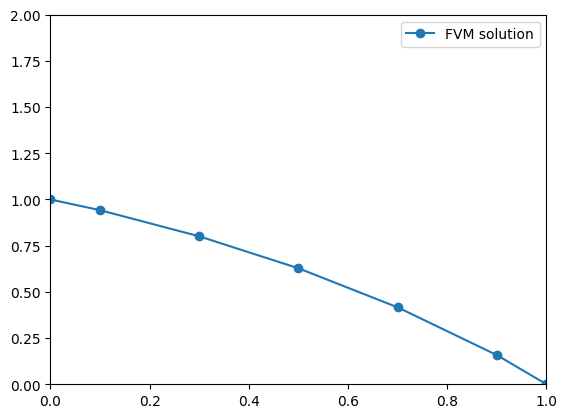

In [49]:
plt.plot(x, fvm_sol, label="FVM solution", marker='o')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.legend()
plt.show()